In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
df= pd.read_csv('raw_data.csv',index_col = ['moment'], parse_dates = ['moment'])
df.head()

,SM_Exgauster\[0:0],SM_Exgauster\[0:1],SM_Exgauster\[0:2],SM_Exgauster\[0:3],SM_Exgauster\[0:4],SM_Exgauster\[0:5],SM_Exgauster\[0:6],SM_Exgauster\[0:7],SM_Exgauster\[0:8],SM_Exgauster\[0:9],...,SM_Exgauster\[6:2],SM_Exgauster\[6.0],SM_Exgauster\[7:0],SM_Exgauster\[7:1],SM_Exgauster\[7:2],SM_Exgauster\[7.0],SM_Exgauster\[8:0],SM_Exgauster\[8:1],SM_Exgauster\[8:2],SM_Exgauster\[8.0]
moment,,,,,,,,,,,,,,,,,,,,,
2023-01-25 06:32:25.125007,1.284722,1.689815,0.964621,1.614583,2.089120,1.440972,2.001208,1.539352,1.494385,1.765046,...,2.600589,1.0,625.000000,138.372635,3.098138,1.0,0.723379,15.567306,-5.605194e-45,0.0
2023-01-25 06:33:25.125007,1.267361,1.689815,0.962173,1.626158,2.065972,1.417824,1.997886,1.556713,1.482208,1.741898,...,2.594604,1.0,617.404541,138.209290,3.100688,1.0,0.723379,15.139420,-5.605194e-45,0.0
2023-01-25 06:34:25.125007,1.296296,1.701389,0.971429,1.620370,2.083333,1.429398,1.990758,1.527778,1.489869,1.712963,...,2.591550,1.0,618.438721,138.295776,3.107095,1.0,0.723379,15.138195,-5.605194e-45,0.0
2023-01-25 06:35:25.125007,1.255787,1.689815,0.971007,1.614583,2.077546,1.429398,2.019292,1.516204,1.489961,1.712963,...,2.686367,1.0,622.107178,138.080093,3.112228,1.0,0.723379,15.138195,-5.605194e-45,0.0
2023-01-25 06:36:25.125007,1.302083,1.701389,0.966538,1.620370,2.112268,1.452546,1.981981,1.562500,1.494923,1.770833,...,2.692058,1.0,617.766602,138.354065,3.106137,1.0,0.723379,15.138195,-5.605194e-45,0.0


Выделим в отдельную серию временной ряд со значениями осевой вибрации. Также удалим пропуски. Для проверки ряда на стационарность используется тест Дики-Фуллера.

<Axes: xlabel='moment'>

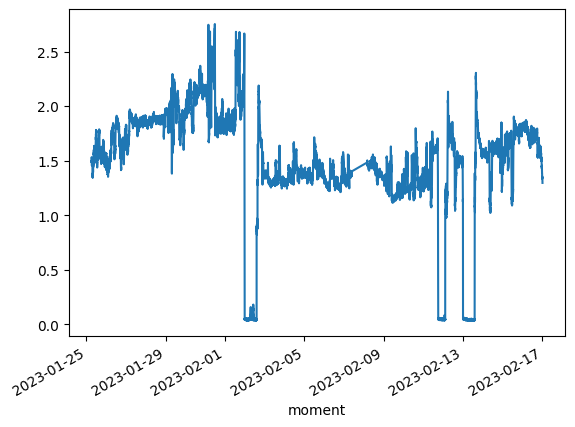

In [3]:
df2 = df['SM_Exgauster\[0:8]'].dropna()
df2.plot()

In [4]:
test = sm.tsa.adfuller(df2)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
for key, value in test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

adf:  -4.80536091352931
p-value:  5.311613807097181e-05
Critial Values:
   1%, -3.430561330786263
Critial Values:
   5%, -2.8616334026000385
Critial Values:
   10%, -2.566819715335456


Полученное 'p-value' превышает уровень 0,05. Это означает,что ряд не стационарен.

Также тест Дики-Фуллера был проведен для вертикаольной вибрации.Данные были очищены от пропусков.

<Axes: xlabel='moment'>

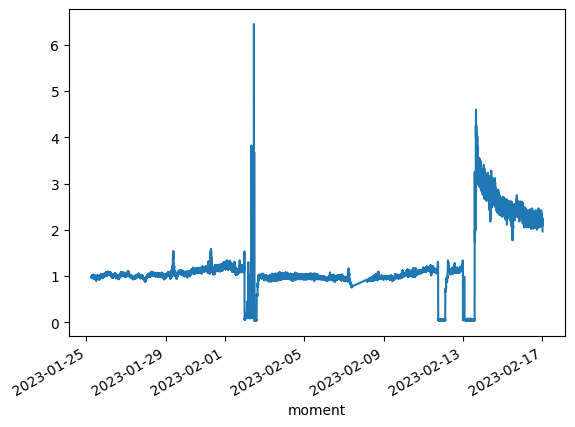

In [5]:
df3=df['SM_Exgauster\[0:10]'].dropna()
df3.plot()

In [6]:
test = sm.tsa.adfuller(df3)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
for key, value in test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

adf:  -2.84979408822689
p-value:  0.051505514100786624
Critial Values:
   1%, -3.4305613444463146
Critial Values:
   5%, -2.861633408637204
Critial Values:
   10%, -2.5668197185488912


Полученное 'p-value' превышает уровень 0,05, а статистика ADF выше критических значений.Это означает,что ряд не стационарен.